# Traffic Sign Dataset - Exploratory Data Analysis

This notebook provides comprehensive EDA for the Vietnamese Traffic Signs dataset including:
- Class distribution analysis
- Sample counts per class
- Image size distribution
- Bounding box statistics
- Dataset split analysis

In [ ]:
summary = {
    'Metric': [
        'Total Classes',
        'Train Images',
        'Val Images',
        'Total Images',
        'Train Annotations',
        'Val Annotations',
        'Total Annotations',
        'Avg Bboxes/Image (Train)',
        'Avg Bboxes/Image (Val)',
        'Most Common Class',
        'Least Common Class',
        'Class Imbalance Ratio',
    ],
    'Value': [
        len(class_names),
        len(list(train_images_path.glob('*.jpg'))),
        len(list(val_images_path.glob('*.jpg'))),
        len(list(train_images_path.glob('*.jpg'))) + len(list(val_images_path.glob('*.jpg'))),
        sum(train_class_counts.values()),
        sum(val_class_counts.values()),
        sum(train_class_counts.values()) + sum(val_class_counts.values()),
        f"{np.mean(train_bbox_counts):.2f}",
        f"{np.mean(val_bbox_counts):.2f}",
        total_per_class.iloc[0]['Class Name'],
        total_per_class.iloc[-1]['Class Name'],
        f"{total_per_class.iloc[0]['Count'] / total_per_class.iloc[-1]['Count']:.2f}:1",
    ]
}

summary_df = pd.DataFrame(summary)
print("\n" + "="*60)
print("DATASET SUMMARY")
print("="*60)
print(summary_df.to_string(index=False))
print("="*60)


DATASET SUMMARY
                  Metric             Value
           Total Classes                52
            Train Images              2552
              Val Images               639
            Total Images              3191
       Train Annotations              6689
         Val Annotations              1645
       Total Annotations              8334
Avg Bboxes/Image (Train)              2.62
  Avg Bboxes/Image (Val)              2.57
       Most Common Class Cấm dừng và đỗ xe
      Least Common Class    Nguy hiểm khác
   Class Imbalance Ratio          357.00:1


## 1. Dataset Summary

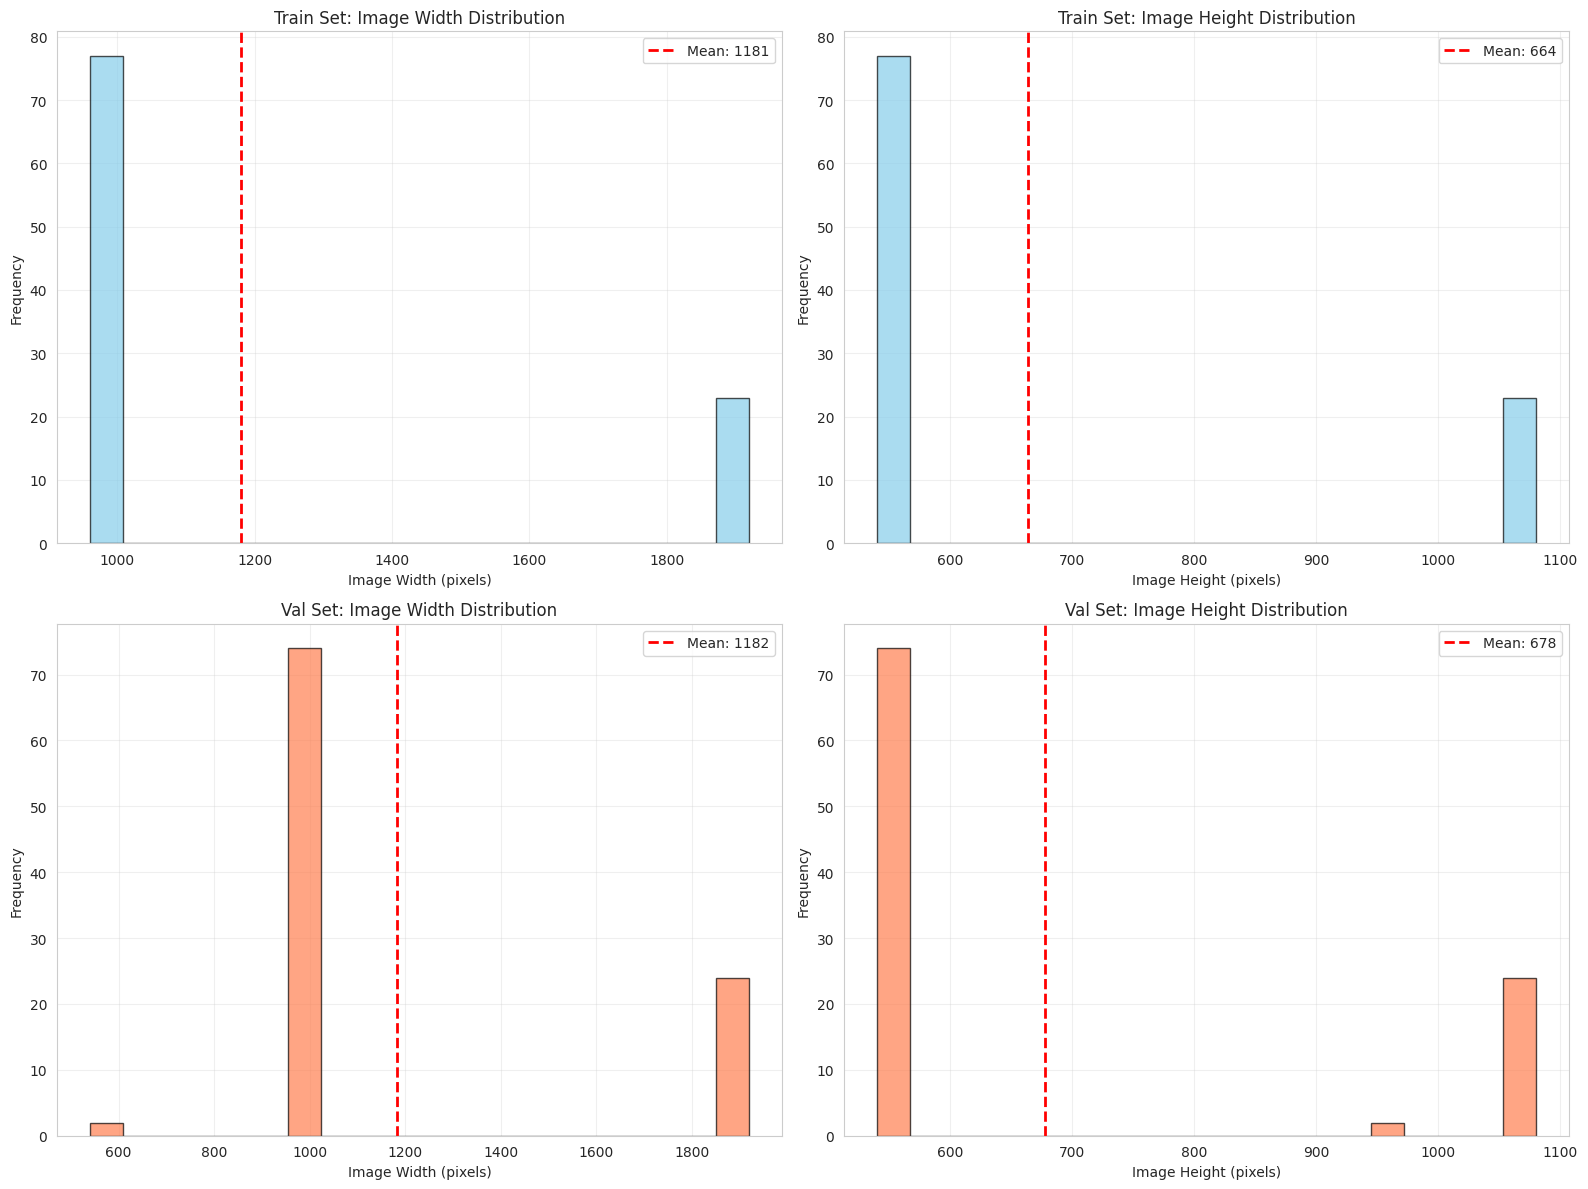

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Train width
axes[0, 0].hist(train_widths, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Image Width (pixels)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Train Set: Image Width Distribution')
axes[0, 0].axvline(np.mean(train_widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_widths):.0f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Train height
axes[0, 1].hist(train_heights, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Image Height (pixels)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Train Set: Image Height Distribution')
axes[0, 1].axvline(np.mean(train_heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_heights):.0f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Val width
axes[1, 0].hist(val_widths, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Image Width (pixels)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Val Set: Image Width Distribution')
axes[1, 0].axvline(np.mean(val_widths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(val_widths):.0f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Val height
axes[1, 1].hist(val_heights, bins=20, color='coral', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Image Height (pixels)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Val Set: Image Height Distribution')
axes[1, 1].axvline(np.mean(val_heights), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(val_heights):.0f}')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def get_image_sizes(image_path, sample_size=100):
    """Get dimensions of sample images"""
    image_files = list(image_path.glob('*.jpg'))[:sample_size]
    widths = []
    heights = []
    
    for img_file in image_files:
        img = cv2.imread(str(img_file))
        if img is not None:
            h, w = img.shape[:2]
            heights.append(h)
            widths.append(w)
    
    return widths, heights

train_widths, train_heights = get_image_sizes(train_images_path)
val_widths, val_heights = get_image_sizes(val_images_path)

print(f"Train images (sample of {len(train_widths)}):")
print(f"  Width - Min: {min(train_widths)}, Max: {max(train_widths)}, Mean: {np.mean(train_widths):.1f}")
print(f"  Height - Min: {min(train_heights)}, Max: {max(train_heights)}, Mean: {np.mean(train_heights):.1f}")

print(f"\nVal images (sample of {len(val_widths)}):")
print(f"  Width - Min: {min(val_widths)}, Max: {max(val_widths)}, Mean: {np.mean(val_widths):.1f}")
print(f"  Height - Min: {min(val_heights)}, Max: {max(val_heights)}, Mean: {np.mean(val_heights):.1f}")

Train images (sample of 100):
  Width - Min: 960, Max: 1920, Mean: 1180.8
  Height - Min: 540, Max: 1080, Mean: 664.2

Val images (sample of 100):
  Width - Min: 540, Max: 1920, Mean: 1182.0
  Height - Min: 540, Max: 1080, Mean: 678.0


## 2. Image Size Analysis

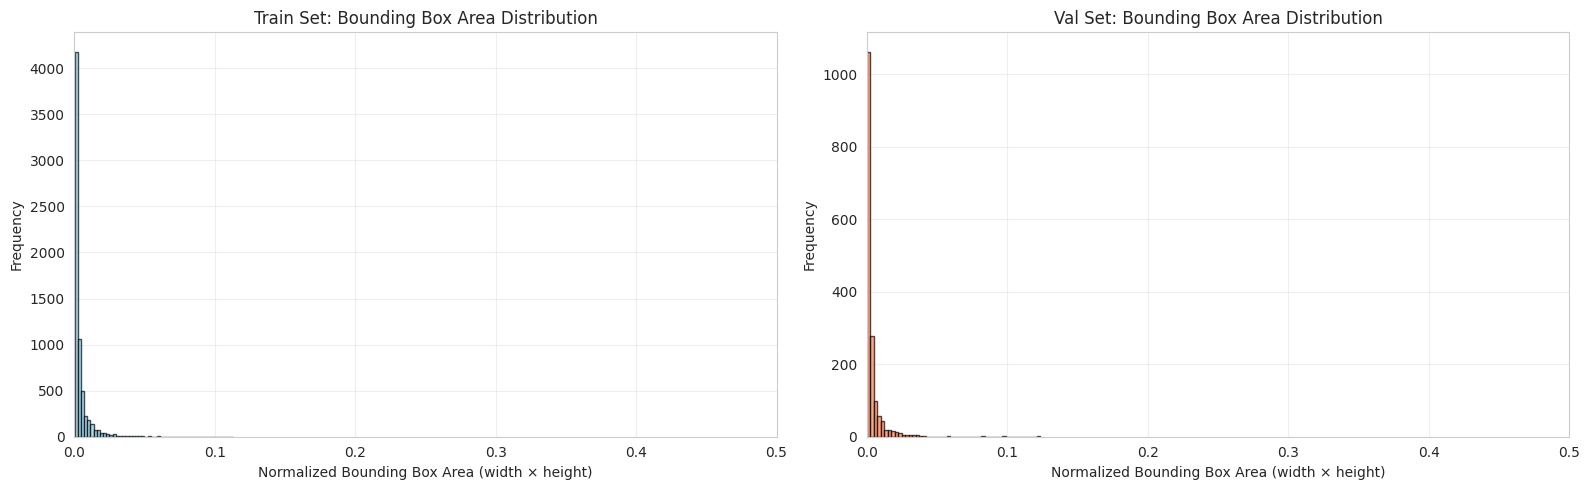

Train - Mean bbox area: 0.0039
Train - Median bbox area: 0.0015
Val - Mean bbox area: 0.0037
Val - Median bbox area: 0.0015


In [13]:
# Bounding box area distribution (normalized)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(train_bbox_areas, bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Normalized Bounding Box Area (width × height)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Train Set: Bounding Box Area Distribution')
axes[0].set_xlim(0, 0.5)
axes[0].grid(alpha=0.3)

axes[1].hist(val_bbox_areas, bins=50, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Normalized Bounding Box Area (width × height)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Val Set: Bounding Box Area Distribution')
axes[1].set_xlim(0, 0.5)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Train - Mean bbox area: {np.mean(train_bbox_areas):.4f}")
print(f"Train - Median bbox area: {np.median(train_bbox_areas):.4f}")
print(f"Val - Mean bbox area: {np.mean(val_bbox_areas):.4f}")
print(f"Val - Median bbox area: {np.median(val_bbox_areas):.4f}")

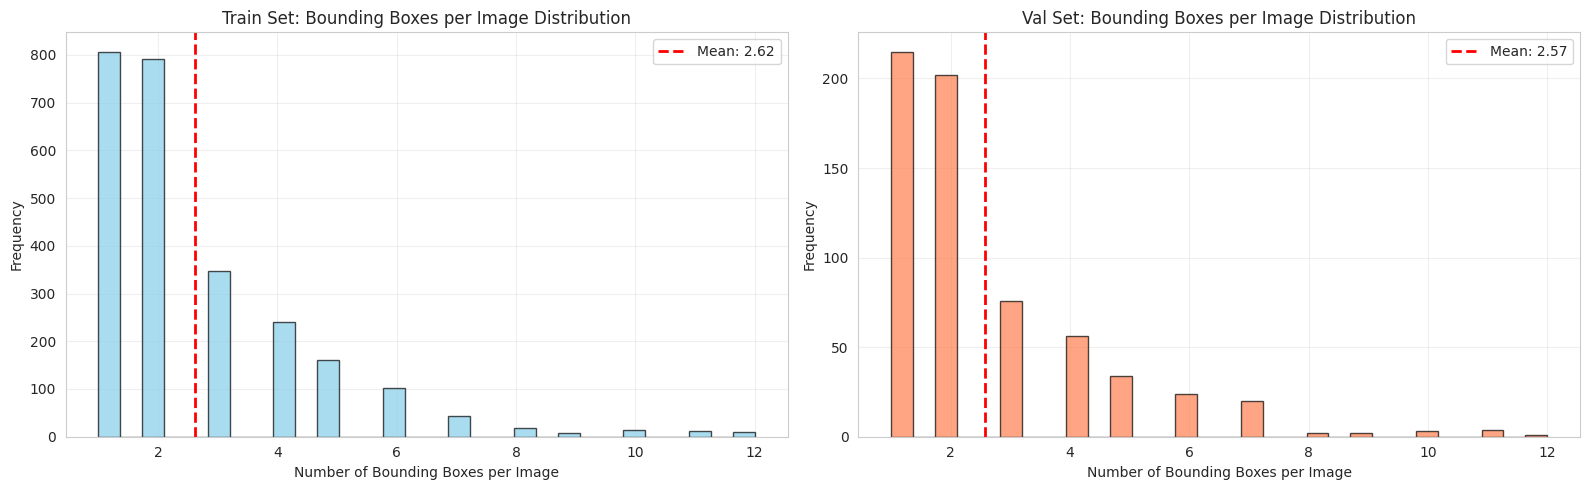

Train - Max bboxes in single image: 12
Val - Max bboxes in single image: 12


In [12]:
# Bounding boxes per image distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(train_bbox_counts, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Number of Bounding Boxes per Image')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Train Set: Bounding Boxes per Image Distribution')
axes[0].axvline(np.mean(train_bbox_counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(train_bbox_counts):.2f}')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(val_bbox_counts, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Number of Bounding Boxes per Image')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Val Set: Bounding Boxes per Image Distribution')
axes[1].axvline(np.mean(val_bbox_counts), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(val_bbox_counts):.2f}')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Train - Max bboxes in single image: {max(train_bbox_counts)}")
print(f"Val - Max bboxes in single image: {max(val_bbox_counts)}")

## 3. Bounding Box Statistics

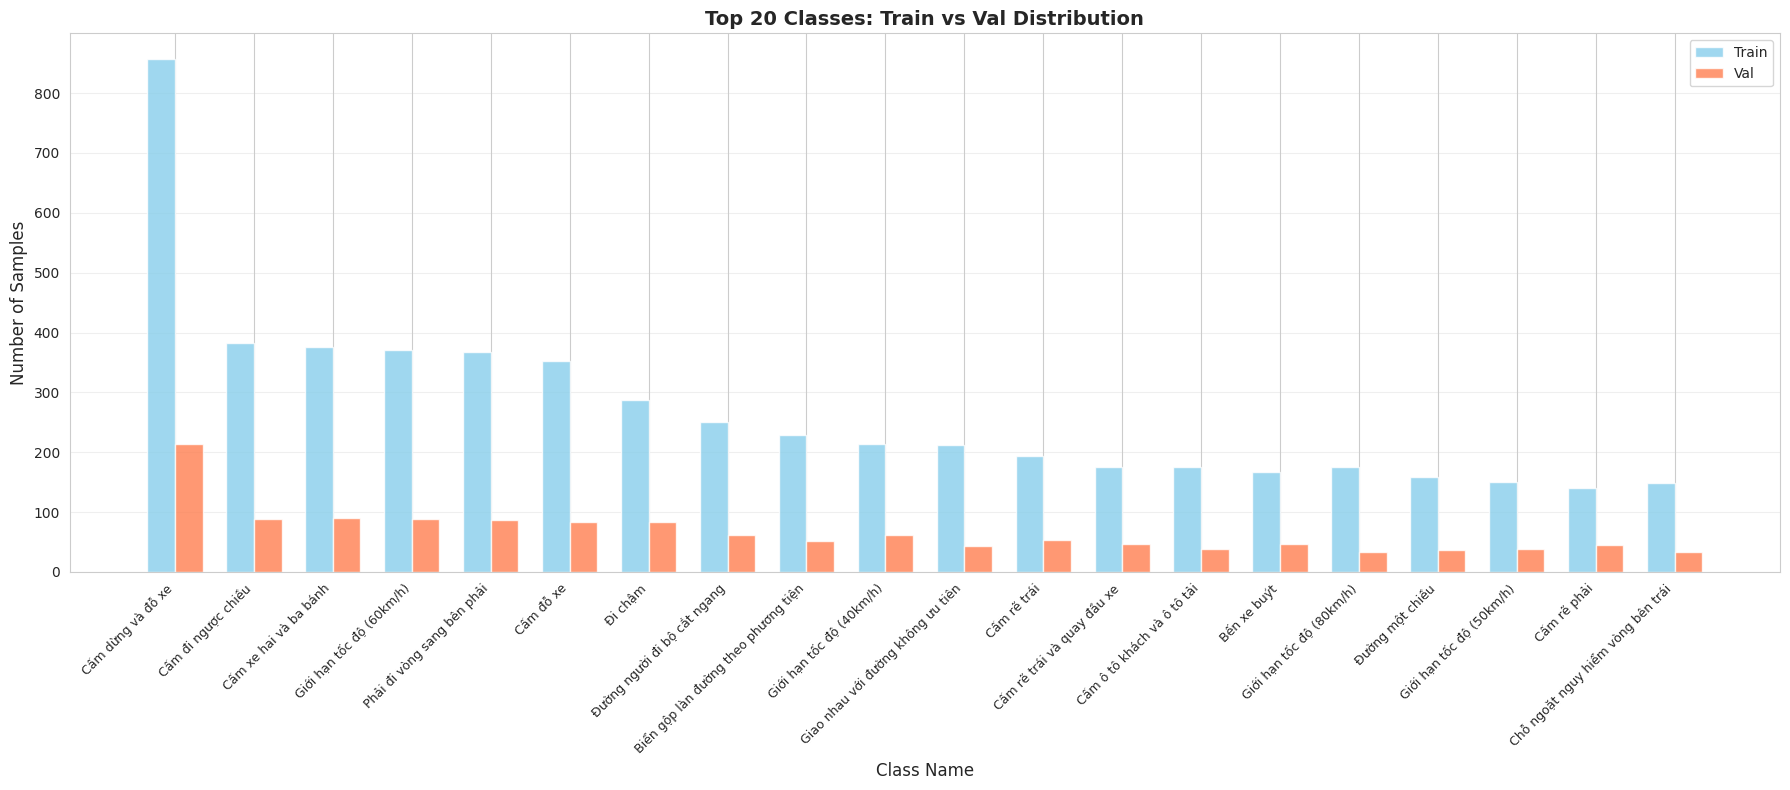

In [11]:
# Train vs Val distribution for top 20 classes
fig, ax = plt.subplots(figsize=(18, 8))

top_20_classes = total_per_class.head(20)['Class ID'].values
train_top20 = train_df[train_df['Class ID'].isin(top_20_classes)]
val_top20 = val_df[val_df['Class ID'].isin(top_20_classes)]

x = np.arange(len(top_20_classes))
width = 0.35

# Create mapping from class_id to class_name
class_id_to_name = {row['Class ID']: row['Class Name'] for _, row in total_per_class.iterrows()}

train_counts = [train_top20[train_top20['Class ID'] == cid]['Count'].sum() if cid in train_top20['Class ID'].values else 0 
                for cid in top_20_classes]
val_counts = [val_top20[val_top20['Class ID'] == cid]['Count'].sum() if cid in val_top20['Class ID'].values else 0 
              for cid in top_20_classes]

bars1 = ax.bar(x - width/2, train_counts, width, label='Train', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, val_counts, width, label='Val', color='coral', alpha=0.8)

ax.set_xlabel('Class Name', fontsize=12)
ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title('Top 20 Classes: Train vs Val Distribution', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([class_id_to_name[cid] for cid in top_20_classes], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

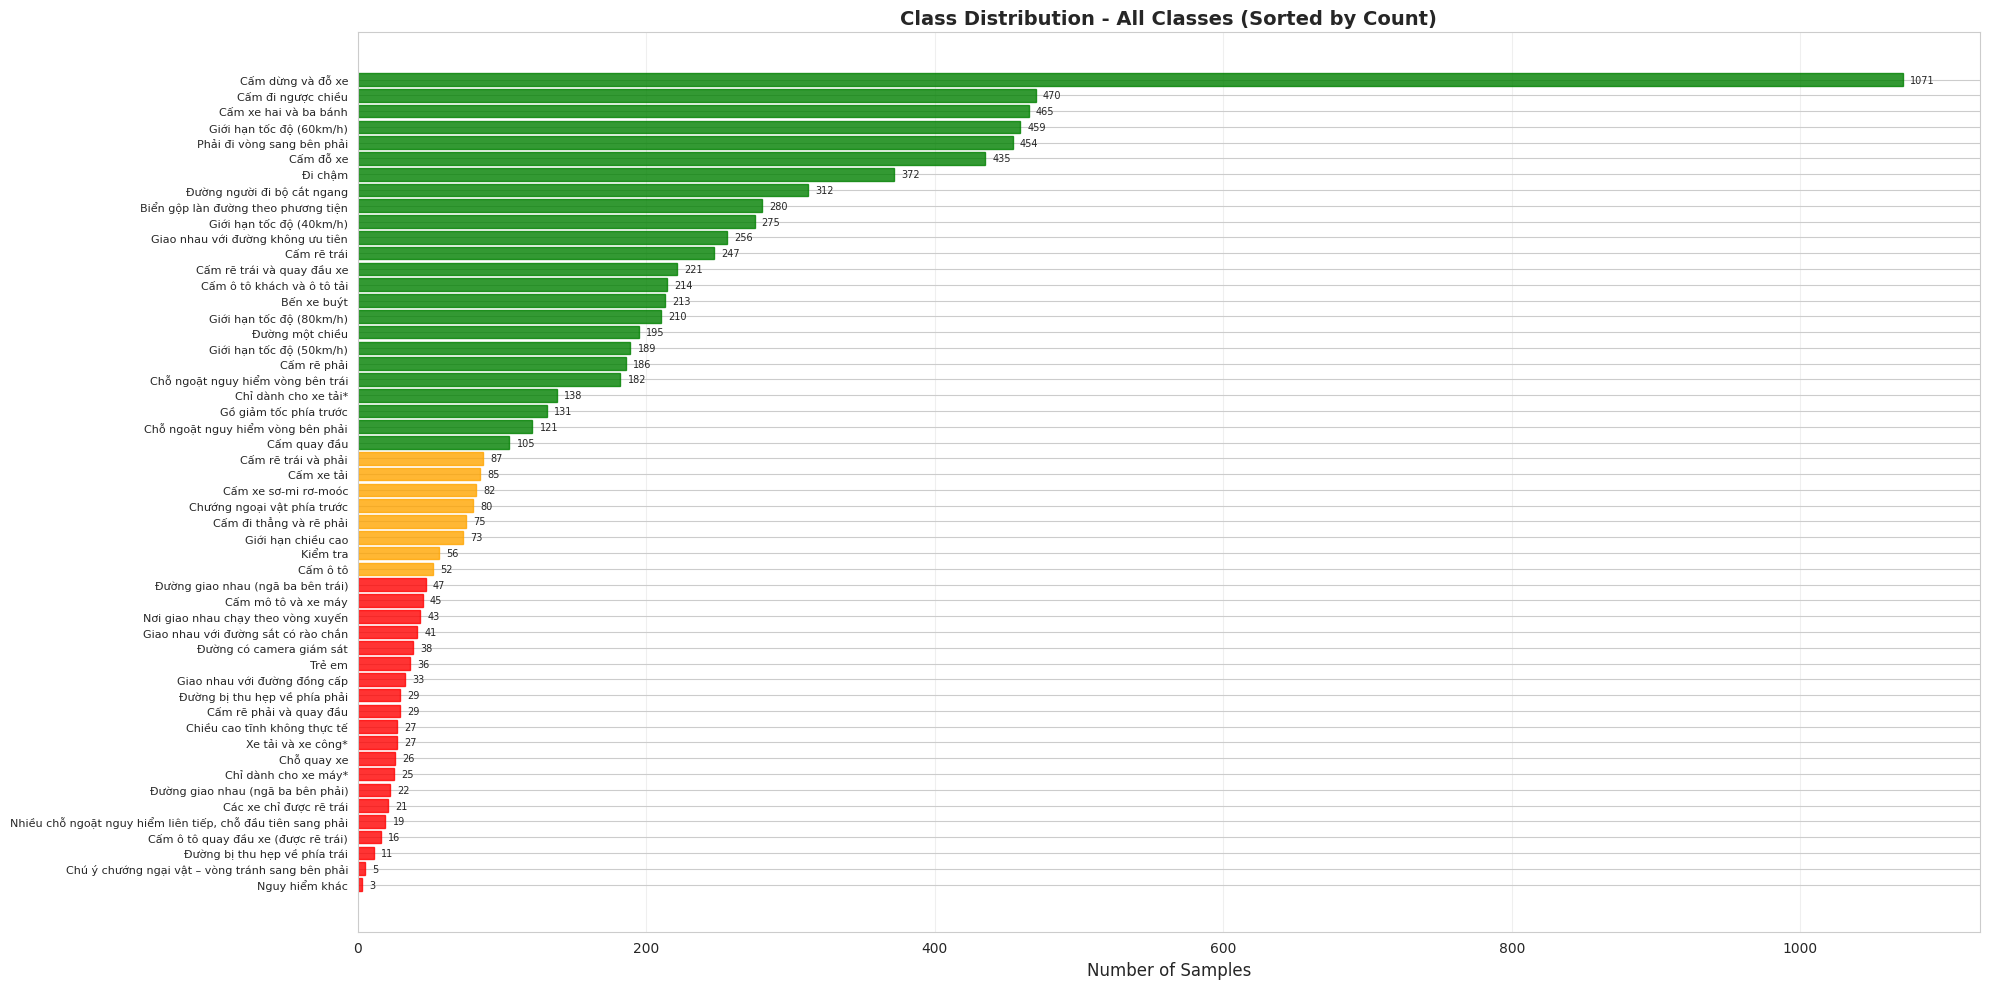


Class Distribution Statistics:
  Mean samples per class: 160.27
  Median samples per class: 83.50
  Std dev: 188.94
  Min samples: 3
  Max samples: 1071


In [10]:
# Plot class distribution - sorted by count
fig, ax = plt.subplots(figsize=(20, 10))

sorted_data = total_per_class.sort_values('Count', ascending=True)
bars = ax.barh(range(len(sorted_data)), sorted_data['Count'], color='steelblue', alpha=0.8)

# Color the bars based on count
colors = ['red' if c < 50 else 'orange' if c < 100 else 'green' for c in sorted_data['Count']]
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_yticks(range(len(sorted_data)))
ax.set_yticklabels(sorted_data['Class Name'], fontsize=8)
ax.set_xlabel('Number of Samples', fontsize=12)
ax.set_title('Class Distribution - All Classes (Sorted by Count)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add count labels on bars
for i, (idx, row) in enumerate(sorted_data.iterrows()):
    ax.text(row['Count'] + 5, i, str(row['Count']), va='center', fontsize=7)

plt.tight_layout()
plt.show()

# Statistics
print(f"\nClass Distribution Statistics:")
print(f"  Mean samples per class: {total_per_class['Count'].mean():.2f}")
print(f"  Median samples per class: {total_per_class['Count'].median():.2f}")
print(f"  Std dev: {total_per_class['Count'].std():.2f}")
print(f"  Min samples: {total_per_class['Count'].min()}")
print(f"  Max samples: {total_per_class['Count'].max()}")

## 4. Visualize Class Distribution

In [9]:
# Create DataFrame for visualization
train_df = pd.DataFrame([
    {'Class ID': k, 'Class Name': class_names[k], 'Count': v, 'Split': 'Train'} 
    for k, v in train_class_counts.items()
])

val_df = pd.DataFrame([
    {'Class ID': k, 'Class Name': class_names[k], 'Count': v, 'Split': 'Val'} 
    for k, v in val_class_counts.items()
])

combined_df = pd.concat([train_df, val_df], ignore_index=True)

# Calculate total per class
total_per_class = combined_df.groupby(['Class ID', 'Class Name'])['Count'].sum().reset_index()
total_per_class = total_per_class.sort_values('Count', ascending=False)

print("\n=== Top 10 Most Common Classes ===")
print(total_per_class.head(10).to_string(index=False))

print("\n=== Bottom 10 Least Common Classes ===")
print(total_per_class.tail(10).to_string(index=False))


=== Top 10 Most Common Classes ===
 Class ID                          Class Name  Count
       10                   Cấm dừng và đỗ xe   1071
        2                  Cấm đi ngược chiều    470
       23               Cấm xe hai và ba bánh    465
       39            Giới hạn tốc độ (60km/h)    459
        3          Phải đi vòng sang bên phải    454
       46                           Cấm đỗ xe    435
       13                             Đi chậm    372
        0         Đường người đi bộ cắt ngang    312
       12 Biển gộp làn đường theo phương tiện    280
       41            Giới hạn tốc độ (40km/h)    275

=== Bottom 10 Least Common Classes ===
 Class ID                                                  Class Name  Count
       43                                Chiều cao tĩnh không thực tế     27
       11                                                 Chỗ quay xe     26
       25                                        Chỉ dành cho xe máy*     25
        1                        

In [8]:
def analyze_labels(labels_path, split_name):
    """Analyze label files and return class distribution"""
    class_counts = Counter()
    bbox_counts = []
    bbox_areas = []
    
    label_files = list(labels_path.glob('*.txt'))
    
    for label_file in label_files:
        with open(label_file, 'r') as f:
            lines = f.readlines()
            bbox_counts.append(len(lines))
            
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id = int(float(parts[0]))
                    width = float(parts[3])
                    height = float(parts[4])
                    area = width * height
                    
                    class_counts[class_id] += 1
                    bbox_areas.append(area)
    
    return class_counts, bbox_counts, bbox_areas

# Analyze train and val sets
train_class_counts, train_bbox_counts, train_bbox_areas = analyze_labels(train_labels_path, "Train")
val_class_counts, val_bbox_counts, val_bbox_areas = analyze_labels(val_labels_path, "Val")

print(f"Train set - Total annotations: {sum(train_class_counts.values())}")
print(f"Val set - Total annotations: {sum(val_class_counts.values())}")
print(f"Train set - Avg bboxes per image: {np.mean(train_bbox_counts):.2f}")
print(f"Val set - Avg bboxes per image: {np.mean(val_bbox_counts):.2f}")

Train set - Total annotations: 6689
Val set - Total annotations: 1645
Train set - Avg bboxes per image: 2.62
Val set - Avg bboxes per image: 2.57


## 5. Class Distribution Analysis

In [7]:
# Define paths
base_path = Path("/home/tourmii/Documents/Projects/Traffic_Sign/dataset")
train_images_path = base_path / "images" / "train"
train_labels_path = base_path / "labels" / "train"
val_images_path = base_path / "images" / "val"
val_labels_path = base_path / "labels" / "val"

# Load class names
classes_file = Path("/home/tourmii/Documents/Projects/Traffic_Sign/datasets/classes_vie.txt")
with open(classes_file, 'r', encoding='utf-8') as f:
    class_names = f.read().splitlines()

print(f"Total classes: {len(class_names)}")
print(f"Train images: {len(list(train_images_path.glob('*.jpg')))}")
print(f"Train labels: {len(list(train_labels_path.glob('*.txt')))}")
print(f"Val images: {len(list(val_images_path.glob('*.jpg')))}")
print(f"Val labels: {len(list(val_labels_path.glob('*.txt')))}")

Total classes: 52
Train images: 2552
Train labels: 2552
Val images: 639
Val labels: 639
